# License Plate Detection and Analysis Model

### Project Description

- The License plate detection model code uses YOLO version 8 nano  
- This model used a dataset with almost 10k images to train  
- The model has an accuracy of 82%  
- The model uses TesseractOCR and PaddleOCR (Paddle yielded better Results with images from multiple angles).  
- The extraction of the character has multiple steps:  
  1. get the points of the bounding box (x1, y1, x2, y2)  
  2. Crop the image at the given points  
  3. Used some preprocessing to enhance the performance of TesseractOCR  
  4. PaddleOCR extracts 2 types of characters:  
     1. English  
     2. Arabic  


## Imports

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import torch
import torchvision
import shutil
import numpy as np
from PIL import Image
from IPython.display import display
import os
import glob
import random
from pathlib import Path
import yaml

## Preprocessing 

In [4]:
image_path = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\License Plate Detection and Extraction Model\Project\Project Image Tests\00a8d9ab7c3b9c0e2_jpg.rf.fd335c7ea7ff9d6955270e901ab19f67.jpg"
image = cv2.imread(image_path)

In [5]:
def enhance(image):
    # denoise using bilateral filter
    denoised = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

    # sharpen with kernel (edge boosting)
    sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]])
    sharpened = cv2.filter2D(denoised, -1, sharpening_kernel)

    # convert to grayscale
    gray = cv2.cvtColor(sharpened, cv2.COLOR_BGR2GRAY)

    # contrast stretching with CLAHE
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    clahe_applied = clahe.apply(gray)

    # binarize using Otsu's thresholding
    t , binary = cv2.threshold(clahe_applied, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return binary

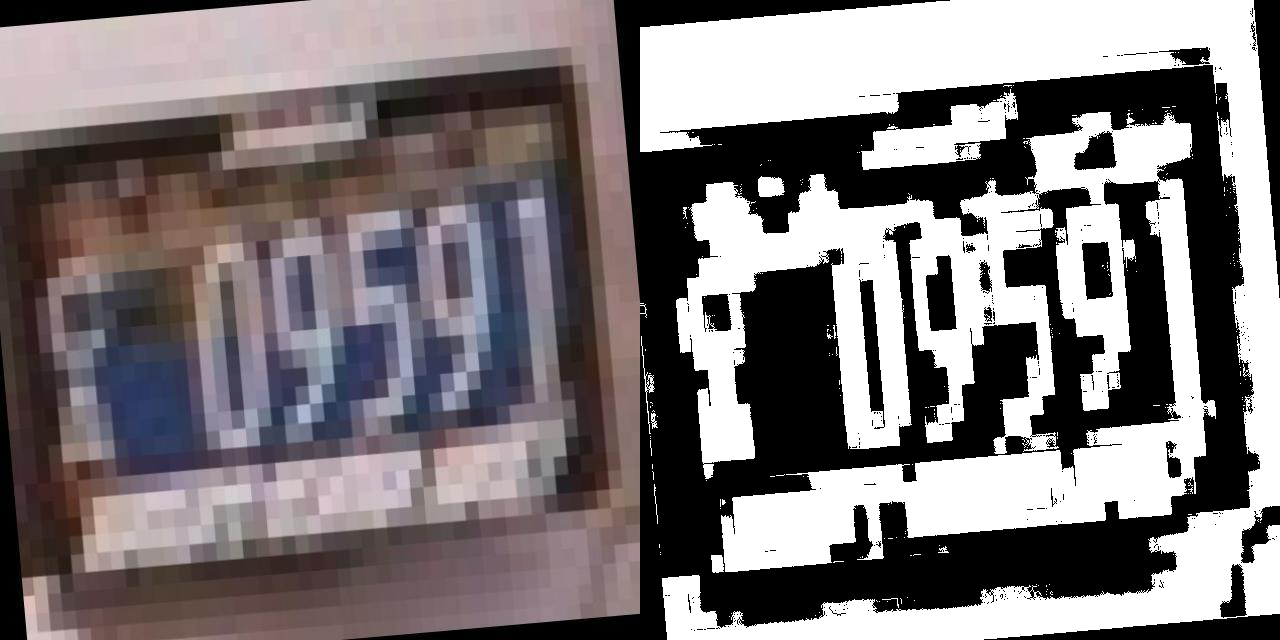

In [7]:
image_path = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\License Plate Detection and Extraction Model\Project\Project Image Tests\00a8d9ab7c3b9c0e2_jpg.rf.fd335c7ea7ff9d6955270e901ab19f67.jpg"
image = cv2.imread(image_path)

enhanced_image = enhance(image)

original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

original_pil = Image.fromarray(original_rgb)
enhanced_pil = Image.fromarray(enhanced_image)

enhanced_pil = enhanced_pil.resize(original_pil.size)

combined = Image.new("RGB", (original_pil.width * 2, original_pil.height))
combined.paste(original_pil, (0, 0))
combined.paste(enhanced_pil.convert("RGB"), (original_pil.width, 0))

display(combined)

## Reading the data file 

In [8]:
path = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\Project\data.yaml"
model = YOLO("yolov8n.pt")

## Trainning the Model

In [6]:
result = model.train(data=path, epochs=50, device=0, amp=False)

Ultralytics 8.3.107  Python-3.12.3 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\Project\data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

train: Scanning C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\Project\train\labels.cache... 6685 im

train: WARNING  C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\Project\train\images\Image_15_png_jpg.rf.9fb322673c5344884427abba8f0823bf.jpg: 1 duplicate labels removed
WARNING  Box and segment counts should be equal, but got len(segments) = 5158, len(boxes) = 8368. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\Project\valid\labels.cache... 1911 imag

WARNING  Box and segment counts should be equal, but got len(segments) = 1462, len(boxes) = 2318. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.91G      1.092      1.509      1.344         29        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14


                   all       1911       2318      0.852       0.73      0.789      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.54G       1.15      1.078       1.38         24        640: 100%|██████████| 418/418 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14


                   all       1911       2318      0.899      0.781      0.839      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.54G      1.146     0.9966      1.379         32        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14


                   all       1911       2318      0.871      0.799      0.839      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.54G      1.104     0.9273      1.356         38        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.891      0.766      0.833      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.54G      1.079     0.8718      1.326         36        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.913      0.824      0.867      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.54G      1.032     0.8332      1.307         28        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.906      0.836      0.877      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.54G       1.01     0.7923      1.282         39        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:13


                   all       1911       2318      0.925      0.841      0.881      0.667

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.54G     0.9891      0.767      1.273         38        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14


                   all       1911       2318      0.896      0.832       0.88      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.54G     0.9723     0.7478      1.265         24        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318       0.91      0.848      0.887      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.54G     0.9607     0.7453      1.256         18        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:13


                   all       1911       2318      0.917      0.848      0.888      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.54G     0.9398     0.7082      1.238         25        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14


                   all       1911       2318      0.919      0.859      0.895      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.54G     0.9303     0.7107      1.239         26        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.942      0.846      0.899      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.54G     0.9293     0.7016      1.232         27        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.938      0.855      0.902      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.54G     0.9062     0.6866      1.225         29        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.948      0.854      0.898      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.54G     0.9007     0.6767      1.217         34        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:13

                   all       1911       2318      0.942      0.858      0.904      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.54G     0.8901     0.6612       1.21         25        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.962      0.842      0.905      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.54G     0.8728     0.6461      1.209         38        640: 100%|██████████| 418/418 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.951      0.853      0.907      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.54G     0.8716     0.6396      1.201         34        640: 100%|██████████| 418/418 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:15

                   all       1911       2318      0.943      0.861      0.908       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.54G     0.8591     0.6384      1.189         30        640: 100%|██████████| 418/418 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.949       0.86      0.905      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.54G     0.8545     0.6356      1.186         30        640: 100%|██████████| 418/418 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.938      0.868      0.909      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.54G     0.8362     0.6126      1.179         30        640: 100%|██████████| 418/418 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:15

                   all       1911       2318      0.948      0.868      0.914      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.54G     0.8377      0.613       1.18         30        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.947      0.862      0.913      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.54G      0.815     0.5983      1.164         39        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.946      0.868      0.918      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.54G      0.825     0.5957      1.166         31        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.944      0.871      0.919      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.54G     0.7997     0.5822      1.154         36        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.957      0.871      0.922      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.54G     0.7992     0.5809      1.156         33        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:13

                   all       1911       2318      0.938      0.882      0.921      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.54G     0.7835      0.563      1.147         25        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.951       0.87      0.923      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.54G     0.7793     0.5593       1.14         33        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318       0.96       0.87      0.925      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.55G     0.7748       0.55      1.138         32        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318       0.96       0.87      0.928      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.56G     0.7692     0.5554      1.138         36        640: 100%|██████████| 418/418 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.962      0.875      0.929      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.56G     0.7619     0.5513      1.129         32        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.961       0.87      0.929      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.56G     0.7579     0.5418      1.127         30        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.957      0.875      0.932      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.56G     0.7455     0.5317      1.123         27        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.967      0.874      0.933       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.56G     0.7406     0.5255      1.114         25        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.943      0.885      0.933       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.56G     0.7412     0.5228       1.12         27        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.969      0.871      0.932      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.56G     0.7287     0.5109      1.114         21        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.959      0.881      0.933      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.56G     0.7192     0.5024      1.107         27        640: 100%|██████████| 418/418 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.963      0.878      0.932      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.56G     0.7086     0.5012        1.1         33        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.966      0.881      0.937      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.56G     0.6932     0.4874      1.089         31        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.965      0.888      0.938      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.56G     0.7035     0.4928      1.092         26        640: 100%|██████████| 418/418 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.979      0.876      0.935      0.797


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.56G     0.6426     0.4076      1.068         17        640: 100%|██████████| 418/418 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.959      0.895       0.94      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.56G     0.6255     0.3922      1.059         15        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:13

                   all       1911       2318      0.965      0.895      0.941        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.56G     0.6039     0.3779      1.042         18        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:13

                   all       1911       2318      0.957      0.903      0.941      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.56G     0.5997     0.3711      1.039         15        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:13

                   all       1911       2318      0.971      0.893      0.943       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.56G     0.5916     0.3624      1.034         16        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.971      0.896      0.944      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.56G     0.5792     0.3545      1.032         14        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:13

                   all       1911       2318      0.965      0.902      0.946      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.56G     0.5706     0.3466      1.024         15        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:13

                   all       1911       2318      0.972        0.9      0.947      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.56G     0.5652     0.3383      1.018         18        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:13

                   all       1911       2318       0.96      0.911      0.947      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.56G     0.5547     0.3352      1.009         16        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:13

                   all       1911       2318      0.966      0.905      0.948      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.56G     0.5484     0.3297      1.009         25        640: 100%|██████████| 418/418 [01:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14

                   all       1911       2318      0.974        0.9      0.947       0.82



50 epochs completed in 1.332 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 6.2MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics 8.3.107  Python-3.12.3 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:14


                   all       1911       2318      0.974      0.899      0.947       0.82
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train5


In [11]:
source_path = 'runs/detect/train5/weights/best.pt'  
destination_path = "best.pt"  

shutil.copy(source_path, destination_path)

'best.pt'

In [9]:
model = YOLO('runs/detect/train5/weights/best.pt')  

In [21]:
image_path = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\License Plate Detection and Extraction Model\Project\Project Image Tests\20140511_150407_resized.jpg"
image = cv2.imread(image_path)

enhanced_image = enhance(image)

enhanced_image_rgb = cv2.cvtColor(enhanced_image, cv2.COLOR_GRAY2BGR)

resized_image = cv2.resize(enhanced_image_rgb, (640, 640))

results = model(resized_image)

results[0].show()  


0: 640x640 1 0, 30.7ms
Speed: 984.8ms preprocess, 30.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


In [23]:
image2_path = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\License Plate Detection and Extraction Model\Project\Project Image Tests\whats-your-custom-plate-say-v0-egu37tscwqu91.jpg"
image2 = cv2.imread(image2_path)

enhanced_image2 = enhance(image2)

enhanced_image2_rgb = cv2.cvtColor(enhanced_image2, cv2.COLOR_GRAY2BGR)

resized_image2 = cv2.resize(enhanced_image2_rgb, (640, 640))

results2 = model(resized_image2)

results2[0].show()  


0: 640x640 1 0, 24.2ms
Speed: 1028.5ms preprocess, 24.2ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


In [12]:
image3_path = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\License Plate Detection and Extraction Model\Project\Project Image Tests\Image test tesla.jpg"
image3 = cv2.imread(image3_path)

enhanced_image3 = enhance(image3)

enhanced_image_rgb3 = cv2.cvtColor(enhanced_image3, cv2.COLOR_GRAY2BGR)

resized_image3 = cv2.resize(enhanced_image_rgb3, (640, 640))

results3 = model(resized_image3)

results3[0].show()  


0: 640x640 1 0, 12.3ms
Speed: 70.9ms preprocess, 12.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


In [24]:
image4_path = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\License Plate Detection and Extraction Model\Project\Project Image Tests\The Big Reveal Test.jpeg"
image4 = cv2.imread(image4_path)

enhanced_image4 = enhance(image4)

enhanced_image_rgb4 = cv2.cvtColor(enhanced_image4, cv2.COLOR_GRAY2BGR)

resized_image4 = cv2.resize(enhanced_image_rgb4, (640, 640))

results4 = model(resized_image4)

results4[0].show()


0: 640x640 1 0, 30.1ms
Speed: 991.3ms preprocess, 30.1ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)


### Prediction

In [14]:
prediction = model.predict(source=r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\License Plate Detection and Extraction Model\Project\Project Image Tests\The Big Reveal Test.jpeg", imgsz=640, conf=0.25, iou=0.45)


image 1/1 C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\License Plate Detection and Extraction Model\Project\Project Image Tests\The Big Reveal Test.jpeg: 448x640 1 0, 80.0ms
Speed: 204.3ms preprocess, 80.0ms inference, 3.9ms postprocess per image at shape (1, 3, 448, 640)


### Validation

In [ ]:
validation = model.val(data=r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\Project\data.yaml", model=r"runs\detect\train5\weights\best.pt", split="val", imgsz=640, conf=0.25, iou=0.45)

Ultralytics 8.3.107  Python-3.12.3 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)


val: Scanning C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\Project\valid\labels.cache... 1911 imag

WARNING  Box and segment counts should be equal, but got len(segments) = 1462, len(boxes) = 2318. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 120/120 [00:


## Read The Ditails in The License Plate

In [15]:
import pytesseract
import re

### First Image

In [25]:
image_path = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\License Plate Detection and Extraction Model\Project\Project Image Tests\0_17_hr_png_jpg.rf.79845d674ffd3d4b19313a4e7ec15eec.jpg"
image = cv2.imread(image_path)

resized_image = cv2.resize(image, (640, 640))

results = model(resized_image)

# print the bounding box positions (x1, y1, x2, y2)
for result in results:
    boxes = result.boxes  
    
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]  
        
        print(f"Bounding Box Coordinates: x1={x1:.2f}, y1={y1:.2f}, x2={x2:.2f}, y2={y2:.2f}")


0: 640x640 1 0, 29.0ms
Speed: 954.5ms preprocess, 29.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)
Bounding Box Coordinates: x1=83.49, y1=303.22, x2=580.67, y2=431.29


In [12]:
image_path = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\Project\Project Image Tests\0_17_hr_png_jpg.rf.79845d674ffd3d4b19313a4e7ec15eec.jpg"

image = cv2.imread(image_path)

detections = [
    {"bbox": [83.49, 303.22, 580.67, 431.29], "confidence": 0.99}  
]

for detection in detections:
    x1, y1, x2, y2 = detection["bbox"]
    
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

    print(f"Bounding Box Coordinates: x1={x1}, y1={y1}, x2={x2}, y2={y2}")

    # crop the license plate
    license_plate_image = image[y1:y2, x1:x2]

    # convert the cropped image to grayscale
    gray_license_plate = cv2.cvtColor(license_plate_image, cv2.COLOR_BGR2GRAY)

    t, thresh_license_plate = cv2.threshold(gray_license_plate, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # use pytesseract to extract text 
    license_plate_text = pytesseract.image_to_string(thresh_license_plate, config='--psm 8', lang='eng')

    # clean the text (remove unwanted characters)
    license_plate_text = re.sub(r'[^A-Za-z0-9]+', '', license_plate_text).strip()

    print("Detected License Plate Text:", license_plate_text)

    with open("license_plate.txt", "w") as file:
        file.write(license_plate_text)

    print("License plate text has been saved to license_plate.txt")

Bounding Box Coordinates: x1=83, y1=303, x2=580, y2=431
Detected License Plate Text: 3294DMT
License plate text has been saved to license_plate.txt


# Model Trained On text

### Data Augmentation Trial 

In [27]:
MAX_AUG_IMAGES = 3000   # number of augmentations for train
VAL_RATIO      = 0.30   # 30% of MAX_AUG_IMAGES for valid

def rotate_image(img, angle):
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1.0)
    return cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REFLECT)

def adjust_brightness_contrast(img, brightness=0, contrast=0):
    return cv2.convertScaleAbs(img, alpha=1+contrast/100.0, beta=brightness)

def apply_motion_blur(img, size=5):
    k = np.zeros((size, size)); k[size//2, :] = 1; k /= size
    return cv2.filter2D(img, -1, k)

def add_gaussian_noise(img, mean=0, std=10):
    gauss = np.random.normal(mean, std, img.shape).astype(np.uint8)
    return cv2.add(img, gauss)

def invert_colors(img):
    return cv2.bitwise_not(img)

def augment_images(src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir, max_aug):
    os.makedirs(dst_img_dir, exist_ok=True)
    os.makedirs(dst_lbl_dir, exist_ok=True)
    generated = 0

    all_imgs = glob.glob(os.path.join(src_img_dir, '*.jpg'))
    random.shuffle(all_imgs)

    for img_path in all_imgs:
        if generated >= max_aug:
            break

        base    = os.path.splitext(os.path.basename(img_path))[0]
        lbl_src = os.path.join(src_lbl_dir, base + '.txt')

        # skip if label missing/empty or has no 5‑column line
        if not os.path.exists(lbl_src) or os.path.getsize(lbl_src)==0:
            continue
        lines = open(lbl_src).readlines()
        if not any(len(l.strip().split())==5 for l in lines):
            continue

        img = cv2.imread(img_path)
        if img is None:
            continue

        aug_list = [
            (cv2.flip(img,1), '_flip'),
            (invert_colors(img), '_invert'),
            (add_gaussian_noise(img), '_noise'),
            (adjust_brightness_contrast(img,30,40), '_bright1'),
            (adjust_brightness_contrast(img,-30,-30), '_bright2'),
            (apply_motion_blur(img,5), '_blur5'),
            (apply_motion_blur(img,7), '_blur7'),
        ]
        for a in (-30,-20,-10,10,20,30):
            aug_list.append((rotate_image(img,a), f'_rot{a}'))

        # save each augmentation
        for aug_img, suffix in aug_list:
            if generated >= max_aug:
                break
            out_img = os.path.join(dst_img_dir, base + suffix + '.jpg')
            out_lbl = os.path.join(dst_lbl_dir, base + suffix + '.txt')
            cv2.imwrite(out_img, aug_img)
            shutil.copy(lbl_src, out_lbl)
            generated += 1

    print(f"[AUGMENT] Generated {generated} images in {os.path.basename(dst_img_dir)}")

def clean_unlabeled_images(img_dir, lbl_dir):
    removed = 0
    for img_path in glob.glob(os.path.join(img_dir, '*.jpg')):
        base     = os.path.splitext(os.path.basename(img_path))[0]
        lbl_path = os.path.join(lbl_dir, base + '.txt')

        if not os.path.exists(lbl_path) or os.path.getsize(lbl_path)==0:
            os.remove(img_path)
            if os.path.exists(lbl_path):
                os.remove(lbl_path)
            removed += 1
            continue

        lines = open(lbl_path).readlines()
        if not any(len(l.strip().split())==5 for l in lines):
            os.remove(img_path)
            os.remove(lbl_path)
            removed += 1

    print(f"[CLEANUP] Removed {removed} invalid samples in {os.path.basename(img_dir)}")

def copy_data_yaml(original_root, output_root):
    src = os.path.join(original_root, 'data.yaml')
    dst = os.path.join(output_root,   'data.yaml')
    shutil.copy(src, dst)
    print(f"[YAML] Copied data.yaml → {dst}")

def locate_split_dirs(root, split):
    return os.path.join(root, split, 'images'), os.path.join(root, split, 'labels')

def run_full_augmentation_pipeline(original_root, output_root):
    plan = {
        'train': MAX_AUG_IMAGES,
        'valid': int(MAX_AUG_IMAGES * VAL_RATIO)
    }

    for split in ('train', 'valid'):
        print(f"\n--- Processing {split.upper()} ---")
        src_i, src_l = locate_split_dirs(original_root, split)
        dst_i = os.path.join(output_root, split, 'images')
        dst_l = os.path.join(output_root, split, 'labels')
        os.makedirs(dst_i, exist_ok=True)
        os.makedirs(dst_l, exist_ok=True)

        count = 0
        for img_path in glob.glob(os.path.join(src_i, '*.jpg')):
            base    = os.path.splitext(os.path.basename(img_path))[0]
            lbl_src = os.path.join(src_l, base + '.txt')
            dst_img  = os.path.join(dst_i, base + '.jpg')
            dst_lbl  = os.path.join(dst_l, base + '.txt')

            img = cv2.imread(img_path)
            if img is None: continue

            if not os.path.exists(lbl_src) or os.path.getsize(lbl_src)==0:
                continue
            lines = open(lbl_src).readlines()
            if not any(len(l.strip().split())==5 for l in lines):
                continue

            shutil.copy(img_path, dst_img)
            shutil.copy(lbl_src, dst_lbl)
            count += 1

        print(f"[COPY] {count} valid originals to {split}")

        augment_images(src_i, src_l, dst_i, dst_l, plan[split])

        clean_unlabeled_images(dst_i, dst_l)

    print("\n--- Copying TEST split ---")
    src_i, src_l = locate_split_dirs(original_root, 'test')
    dst_i = os.path.join(output_root, 'test', 'images')
    dst_l = os.path.join(output_root, 'test', 'labels')
    os.makedirs(dst_i, exist_ok=True)
    os.makedirs(dst_l, exist_ok=True)
    for img in glob.glob(os.path.join(src_i, '*.jpg')):
        base = os.path.splitext(os.path.basename(img))[0]
        shutil.copy(img, os.path.join(dst_i, base + '.jpg'))
        lbl = os.path.join(src_l, base + '.txt')
        if os.path.exists(lbl):
            shutil.copy(lbl, os.path.join(dst_l, base + '.txt'))
    print(f"[COPY] Test images copied: {len(glob.glob(dst_i+'/*.jpg'))}")

    print("\n--- Deduplicating TEST from TRAIN/VALID ---")
    test_bases = {os.path.splitext(os.path.basename(p))[0]
                  for p in glob.glob(os.path.join(dst_i, '*.jpg'))}
    removed = 0
    for split in ('train','valid'):
        ti = os.path.join(output_root, split, 'images')
        tl = os.path.join(output_root, split, 'labels')
        for base in test_bases:
            img_f = os.path.join(ti, base + '.jpg')
            lbl_f = os.path.join(tl, base + '.txt')
            if os.path.exists(img_f):
                os.remove(img_f); removed += 1
            if os.path.exists(lbl_f):
                os.remove(lbl_f)
    print(f"[DEDUPE] Removed {removed} duplicates from train/valid")

    copy_data_yaml(original_root, output_root)

In [28]:
if __name__ == '__main__':
    original_dataset = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\Project\Text Detection Model" 
    output_dataset   = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\Project\Augmented Data"

    run_full_augmentation_pipeline(original_dataset, output_dataset)


--- Processing TRAIN ---
[COPY] 8388 valid originals to train
[AUGMENT] Generated 3000 images in images
[CLEANUP] Removed 0 invalid samples in images

--- Processing VALID ---
[COPY] 218 valid originals to valid
[AUGMENT] Generated 900 images in images
[CLEANUP] Removed 0 invalid samples in images

--- Copying TEST split ---
[COPY] Test images copied: 248

--- Deduplicating TEST from TRAIN/VALID ---
[DEDUPE] Removed 0 duplicates from train/valid
[YAML] Copied data.yaml → C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\Project\Augmented Data\data.yaml


In [20]:
source_path = r"runs\detect\train7\weights\best.pt"
destination_path = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\Project\Text Detection Model\best.pt"

shutil.copy(source_path, destination_path)

'C:\\Users\\DELL\\Desktop\\Sem 2\\Visual Computing and Image Processing\\Project\\Text Detection Model\\best.pt'

### Image to Text (English)

In [18]:
from paddleocr import PaddleOCR

D:\Anaconda\Lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


In [26]:
ocr = PaddleOCR(use_angle_cls=True, lang='en')  

def detect_and_read(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Cannot load image: {image_path}")
    
    results = model(img, conf=0.25, iou=0.45)

    for res in results:
        if res.boxes is None or len(res.boxes.xyxy) == 0:
            print("No license plates detected.")
            return

        for i, box in enumerate(res.boxes.xyxy):
            x1, y1, x2, y2 = map(int, box.tolist())
            crop = img[y1:y2, x1:x2]

            crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)

            result = ocr.ocr(crop_rgb, cls=True)

            if result and result[0]:
                text = ' '.join([line[1][0] for line in result[0]])
                print(f"[OCR] Plate #{i+1}: {text}")
            else:
                print(f"[OCR] Plate #{i+1}: No text detected.")

if __name__ == "__main__":
    IMAGE_PATH = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\License Plate Detection and Extraction Model\Project\Project Image Tests\car-license-plates-automobile-registration-numbers-vector-template-letters-2BNRFM2.jpg"
    detect_and_read(IMAGE_PATH)


[2025/05/07 15:59:34] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\DELL/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\DELL/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', r

### Image to Text (Arabic)

In [27]:
ocr = PaddleOCR(use_angle_cls=True, lang='arabic')  

def detect_and_read(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Cannot load image: {image_path}")
    
    results = model(img, conf=0.25, iou=0.45)

    for res in results:
        if res.boxes is None or len(res.boxes.xyxy) == 0:
            print("No license plates detected.")
            return

        for i, box in enumerate(res.boxes.xyxy):
            x1, y1, x2, y2 = map(int, box.tolist())
            crop = img[y1:y2, x1:x2]

            crop_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)

            result = ocr.ocr(crop_rgb, cls=True)

            if result and result[0]:
                raw_text = ' '.join([line[1][0] for line in result[0]])
                spaced_text = ' '.join(char for char in raw_text)
                print(f"[OCR] Plate #{i+1}: {spaced_text}")
            else:
                print(f"[OCR] Plate #{i+1}: No text detected.")

if __name__ == "__main__":
    IMAGE_PATH = r"C:\Users\DELL\Desktop\Sem 2\Visual Computing and Image Processing\License Plate Detection and Extraction Model\Project\Project Image Tests\0857c010ed675562bfec36ccfd69a60f.jpg"
    detect_and_read(IMAGE_PATH)

[2025/05/07 16:00:35] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\DELL/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\DELL/.paddleocr/whl\\rec\\arabic\\arabic_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_sha